In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
data = np.loadtxt("ASTR19_F25_group_project_data.txt", dtype=str, comments="#")
days = data[:,0].astype(float)
times = data[:,1]
heights = data[:,2].astype(float)   # tide height in feet

/var/folders/nd/kqchyjwx31lfd3sdd83zlst40000gn/T/ipykernel_4986/1965793431.py:1: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = np.loadtxt("ASTR19_F25_group_project_data.txt", dtype=str, comments="#")


In [6]:
def to_hours(t):
    hh, mm = t.split(":")
    return float(hh) + float(mm)/60.0

hours_in_day = np.array([to_hours(t) for t in times])

t_hours = (days - 1.0)*24.0 + hours_in_day

In [7]:
def tide_function(t, A1, A2, phi1, phi2, C):
    w1 = 2.0*np.pi/12.42   # semidiurnal lunar tide (~12.42 hr)
    w2 = 2.0*np.pi/24.0    # diurnal solar tide (~24 hr)
    return A1*np.sin(w1*t + phi1) + A2*np.sin(w2*t + phi2) + C

In [8]:
sigma = 0.25*np.ones_like(heights)

A_guess = 0.5*(heights.max() - heights.min())
C_guess = heights.mean()
p0 = [A_guess, A_guess/2.0, 0.0, 0.0, C_guess]

popt, pcov = curve_fit(
    tide_function,
    t_hours,
    heights,
    p0=p0,
    sigma=sigma,
    absolute_sigma=True,
    maxfev=10000
)

print("Best-fit parameters [A1, A2, phi1, phi2, C] =")
print(popt)

Best-fit parameters [A1, A2, phi1, phi2, C] =
[-1.01940975  2.67614778 -1.02364008 -0.27512787  2.52378668]


In [9]:
t_fit = np.linspace(t_hours.min(), t_hours.max(), 1000)
h_fit = tide_function(t_fit, *popt)

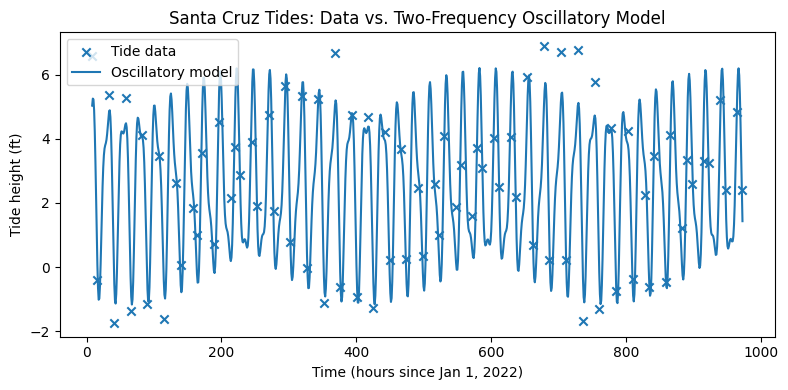

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(t_hours, heights, label="Tide data", marker="x")
plt.plot(t_fit, h_fit, label="Oscillatory model")
plt.xlabel("Time (hours since Jan 1, 2022)")
plt.ylabel("Tide height (ft)")
plt.title("Santa Cruz Tides: Data vs. Two-Frequency Oscillatory Model")
plt.legend()
plt.tight_layout()

plt.savefig("tide_fit.pdf")
plt.show()